# <font color=black> Analysis - FC-based parcellation using correlation </font>
<hr style="border:1px solid black">

In [1]:
import sys,json
import glob, os
import numpy as np
import nibabel as nib
import time
from nilearn import datasets, plotting, image, surface
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from fc_based_parcellation import FC_Parcellation

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Initialization
<hr style="border:0.5px solid black">

### Load existing configuration file ...

In [19]:
# Load the config file with all information
filetag = "Postcentral_L_to_C1toC7_gm_07_DR"
with open('../../../brain_spine/results/fc_parcellation/corr/' + filetag + '/config_' + filetag + '.json') as config_file:
    config = json.load(config_file)
source = 'spinalcord'
target = 'brain'
config['brain_surfaces']='/templates/surf/'
# Instantiate class
# Note: this will save a config file with all relevant information and prepare folder structure
fc_parcellation = FC_Parcellation(config,source,target,'corr')

### ... or build new one

In [27]:
# Load the config file with all information
with open('../../config/config_fc_based_parcellation_NK.json') as config_file:
    config = json.load(config_file)
# Define tag of this analysis (used for saving)
config['output_tag'] = "Postcentral_L_to_C1toC7_gm_07_DR"
# Define source, target, and the corresponding masks
target = 'spinalcord'
source = 'brain'
# Note: paths should be with respect to main directory
config['file_tag']['spinalcord'] = "_task-rest_bold_stc_sc_moco_brsc_BP_inTemplate_s.nii.gz"
config['file_tag']['brain'] = "_task-rest_bold_stc_brain_moco_brsc_BP_reg_SPM_inTemplate2mm_s.nii.gz"
config['template']['spinalcord'] = "/templates/PAM50_hc_project/template/PAM50_t2.nii.gz"
config['spinal_levels'] = "/templates/PAM50_hc_project/template/PAM50_spinal_levels_C1C7.nii.gz"
config['masks']['target'] = "/templates/PAM50_hc_project/atlas/PAM50_atlas_DR_C1C7.nii.gz"
config['masks']['source'] = "/templates/MNI_hc_project/julich_postcentral_sensory_L_2mm.nii"

config['brain_surfaces']='/templates/surf/'

config['list_subjects'] = ["P030", "P099","A006","A007","A008","A009","A011","A013","A023","A024","A025","A026","A027","A028","A029","A030","A032","A033","A034","A036","A037","A038","A039","A043","A044","A045","A046","A048","A050","A051","A052"]

# Instantiate class
# Note: this will save a config file with all relevant information and prepare folder structure
fc_parcellation = FC_Parcellation(config,source,target,'corr')

# Analyses
<hr style="border:0.5px solid black">

### Compute the voxelwise correlation & compute mean across participants

In [28]:
start = time.time()
# Loop through the subjects to compute fc 
for sub_id,sub in enumerate(fc_parcellation.config['list_subjects']): 
    print(f'\033[1mSUBJECT {sub}\033[0m')
    # Compute correlation without saving files
    fc_parcellation.compute_voxelwise_fc(sub=sub, 
                                        overwrite=False)
# Compute means
fc_parcellation.compute_mean_fc_sim(overwrite=False)
print("\033[1m... Operation performed in %.2f s!\033[0m" % (time.time() - start))

SUBJECT P030
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT P099
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A006
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A007
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
SUBJECT A008
COMPUTE VOXELWISE FC
Standardize = True
Overwrite r


DONE
SUBJECT A052
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... Loading data
... Computing FC for all possibilities
... Metric: correlation
... Fisher transforming correlations
... Computing similarity matrix

DONE
COMPUTE MEAN ACROSS PARTICIPANTS
Overwrite results = False
... Computing mean FC
... Computing mean similarity matrix

DONE
... Operation performed in 323.97 s!


### Compute the clustering on the mean similarity matrix and generate corresponding maps

In [30]:
# Run clustering and save labels
fc_parcellation.run_clustering(take_mean=True,sub=None,
                                k_range=range(2,21),features='sim',algorithm='agglom',
                                save_visplot_sc=False, overwrite=False)

CLUSTERING AT THE INDIVIDUAL LEVEL
Algorithm = agglom
Features = sim
K value(s) = range(2, 21)
Overwrite results = False
Clustering will be done on the mean across participants!
K = 2
... Loading FC from file
... Loading similarity matrix from file
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 3
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 4
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 5
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 6
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 7
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 8
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 9
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 10
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 11
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 12
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 13
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 14
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 15
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 16
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 17
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 18
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 19
... Running agglomerative clustering


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 20
... Running agglomerative clustering




/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


In [48]:
fc_parcellation.prepare_target_maps(label_type='mean',features='sim',indiv_algorithm='agglom',k_range=9,overwrite=False)

PREPARE TARGET MAPS
Type of source labels = mean
K value(s) = 9
Features = sim
Overwrite results = False
K = 9
... Computing target maps
...... Subject P030


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/image/resampling.py:493: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(


...... Subject P099
...... Subject A006
...... Subject A007
...... Subject A008
...... Subject A009
...... Subject A011
...... Subject A013
...... Subject A023
...... Subject A024
...... Subject A025
...... Subject A026
...... Subject A027
...... Subject A028
...... Subject A029
...... Subject A030
...... Subject A032
...... Subject A033
...... Subject A034
...... Subject A036
...... Subject A037
...... Subject A038
...... Subject A039
...... Subject A043
...... Subject A044
...... Subject A045
...... Subject A046
...... Subject A048
...... Subject A050
...... Subject A051
...... Subject A052
DONE



### WTA analysis

In [50]:
fc_parcellation.winner_takes_all(label_type='mean',input_type='corr',indiv_algorithm='agglom',features='sim',apply_threshold=0,cluster_threshold=100,k=9, overwrite=True)

RUN WINNER-TAKES-ALL ANALYSIS
Type of source labels = mean
K value = 9
Features = sim
Overwrite results = True
K1 will have a value of 1
K2 will have a value of 2
K3 will have a value of 3
K4 will have a value of 4
K5 will have a value of 5
K6 will have a value of 6
K7 will have a value of 7
K8 will have a value of 8
K9 will have a value of 9


FileNotFoundError: [Errno 2] No such file or directory: '/media/miplab-nas2/Data3/BMPD/hc_project//brain_spine/results/fc_parcellation//corr/Postcentral_L_to_C1toC7_gm_07_DR/target/sim//K9/mean_labels/stats/agglom/K9_wta_corr.nii.gz'

# Plotting
<hr style="border:0.5px solid black">

In [ ]:
for k_ind in range(1,8):
    img_to_show = '/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/C1toC7_gm_07_to_iCAP_SMC/target/sim/K7/wta_fc_mean/K7_' + str(k_ind) + '_fc_profile.nii.gz'
    for hemi in ['left','right']:
        img_surf = surface.vol_to_surf(img_to_show, config['main_dir'] + config['brain_surfaces'] + 'rh.pial', radius=0,interpolation='nearest', kind='auto', n_samples=10, mask_img=None, depth=None) if hemi == 'right' else surface.vol_to_surf(img_to_show, config['main_dir'] + config['brain_surfaces'] + 'lh.pial', radius=0,interpolation='nearest', kind='auto', n_samples=10, mask_img=None, depth=None)
           
        plot = plotting.plot_surf_stat_map(stat_map=img_surf, surf_mesh=config['main_dir']+config['brain_surfaces']+'rh.inflated' if hemi =='right' else config['main_dir']+config['brain_surfaces']+'lh.inflated',
                       cmap='cold_hot', colorbar=True,
                       hemi=hemi, view='lateral', threshold=0.015, vmin=-0.05,vmax=0.05,
                       bg_map=config['main_dir']+config['brain_surfaces']+'rh.sulc' if hemi=='right' else config['main_dir']+config['brain_surfaces']+'rh.sulc', #bg_on_data=True,
                       darkness=0.7)
        plot_path = '/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/C1toC7_gm_07_to_iCAP_SMC/target/sim/K7/wta_fc_mean/K7_' + str(k_ind) + '_fc_profile_' + hemi + '.png'
        plot.savefig(plot_path)

### WTA maps

In [ ]:
fc_parcellation.plot_brain_map(showing='source',k=9,features='sim',wta_fc_mean=True,indiv_algorithm='agglom',group_type='mean', save_figure=True)

### Plot label maps

In [ ]:
fc_parcellation.plot_spinal_map(showing='target',k=9,input_type='corr',label_type='mean',wta_fc_mean=False,indiv_algorithm='agglom',features='sim', slice_y=24,save_figure=True)

### Validity
<hr style="border:0.5px solid black">

### Plot validity metrics

VALIDITY METRICS
K value(s) = range(2, 21)
Features = sim
Saving figures = True



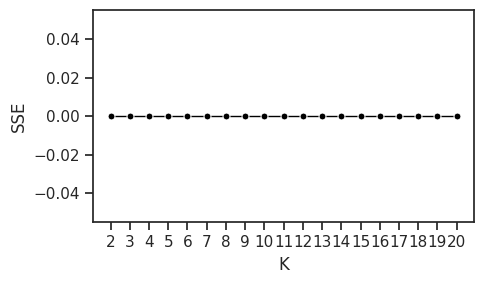

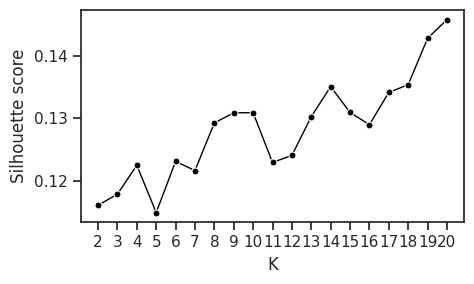

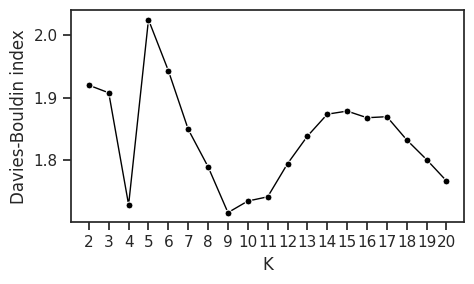

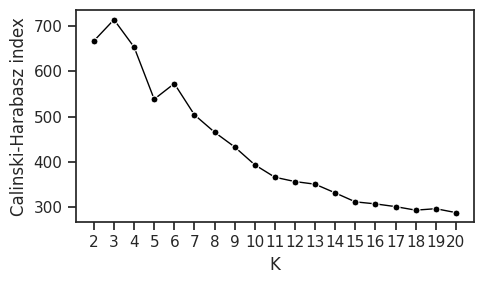

In [31]:
fc_parcellation.plot_validity(k_range=range(2,21),take_mean=True,features='sim',indiv_algorithm='agglom',internal=["SSE", "silhouette", "davies", "calinski"], save_figures=True)